In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('housing.csv').dropna()
df = pd.get_dummies(df, columns=['ocean_proximity'], prefix='')
original_latlong = df[['latitude', 'longitude']]
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# df['ocean_proximity'], labels = df['ocean_proximity'].factorize()
# print(labels)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,-0.890239,-0.682713,-0.015645,2.828661,-0.384186
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,-0.890239,-0.682713,-0.015645,2.828661,-0.384186
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,-0.890239,-0.682713,-0.015645,2.828661,-0.384186
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,-0.890239,-0.682713,-0.015645,2.828661,-0.384186
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,-0.890239,-0.682713,-0.015645,2.828661,-0.384186


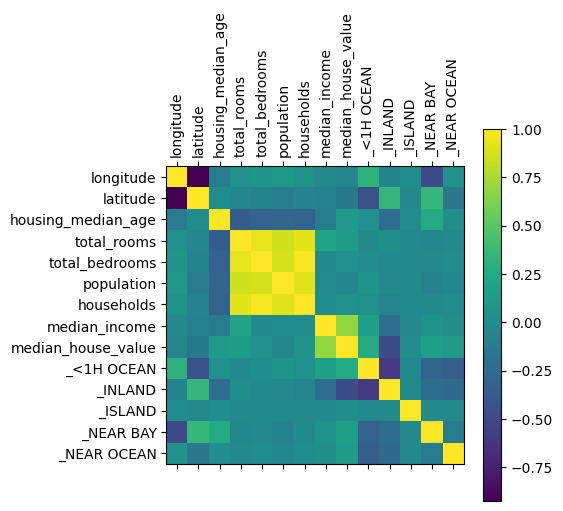

In [40]:
# Correlation Matrix
corr_matrix = df.corr()
plt.matshow(corr_matrix)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()

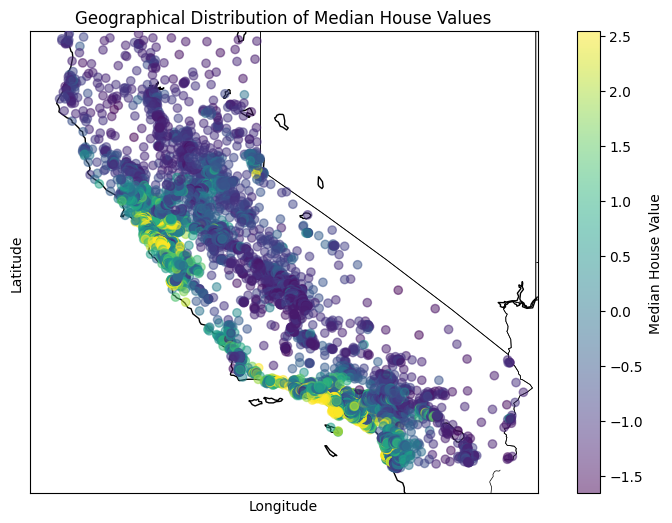

In [41]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(10, 6))

# Create a Basemap instance
geo_map = Basemap(projection='cyl', llcrnrlat=32, urcrnrlat=42, llcrnrlon=-125, urcrnrlon=-114, resolution='i')
geo_map.drawcoastlines()
geo_map.drawstates()

# Scatter plot
sc = plt.scatter(original_latlong['longitude'], original_latlong['latitude'], c=df['median_house_value'], cmap='viridis', alpha=0.5, zorder=5)

# Colorbar and labels
plt.colorbar(sc, label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Median House Values')
plt.show()

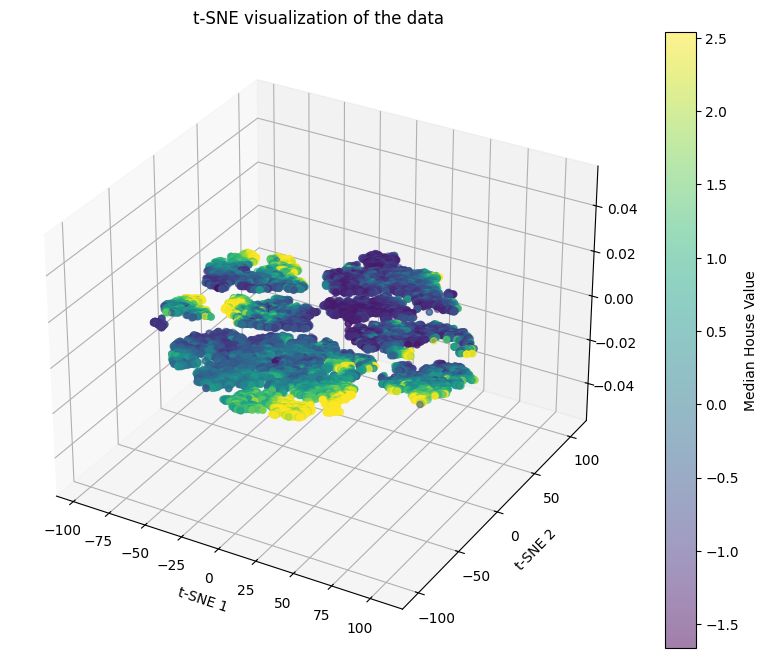

In [69]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
tsne_results = tsne.fit_transform(df)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# Scatter plot
sc = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['median_house_value'], cmap='viridis', alpha=0.5)

# Colorbar and labels
plt.colorbar(sc, label='Median House Value')
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
plt.title('t-SNE visualization of the data')
plt.show()


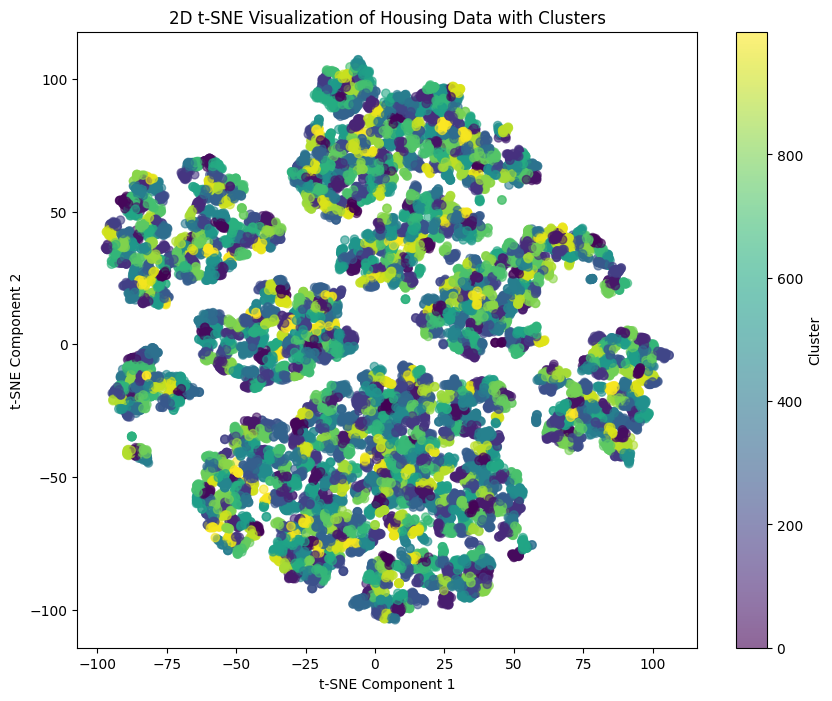

In [68]:
# Perform KMeans clustering on 2D t-SNE data
kmeans_2d = KMeans(n_clusters=1000, random_state=42)
clusters_2d = kmeans_2d.fit_predict(tsne_results)

plt.figure(figsize=(10, 8))

# Scatter plot with clusters
sc = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters_2d, cmap='viridis', alpha=0.6)

# Colorbar and labels
plt.colorbar(sc, label='Cluster')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('2D t-SNE Visualization of Housing Data with Clusters')

plt.show()

In [84]:
from sklearn.model_selection import train_test_split

X = df.drop('median_house_value', axis=1).values
y = df['median_house_value'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4242)

LinearRegression 0.362396329185137
KNeighborsRegressor 0.2884040036183826
RandomForestRegressor 0.18448082495099888
XGBRegressor 0.17410476071449593


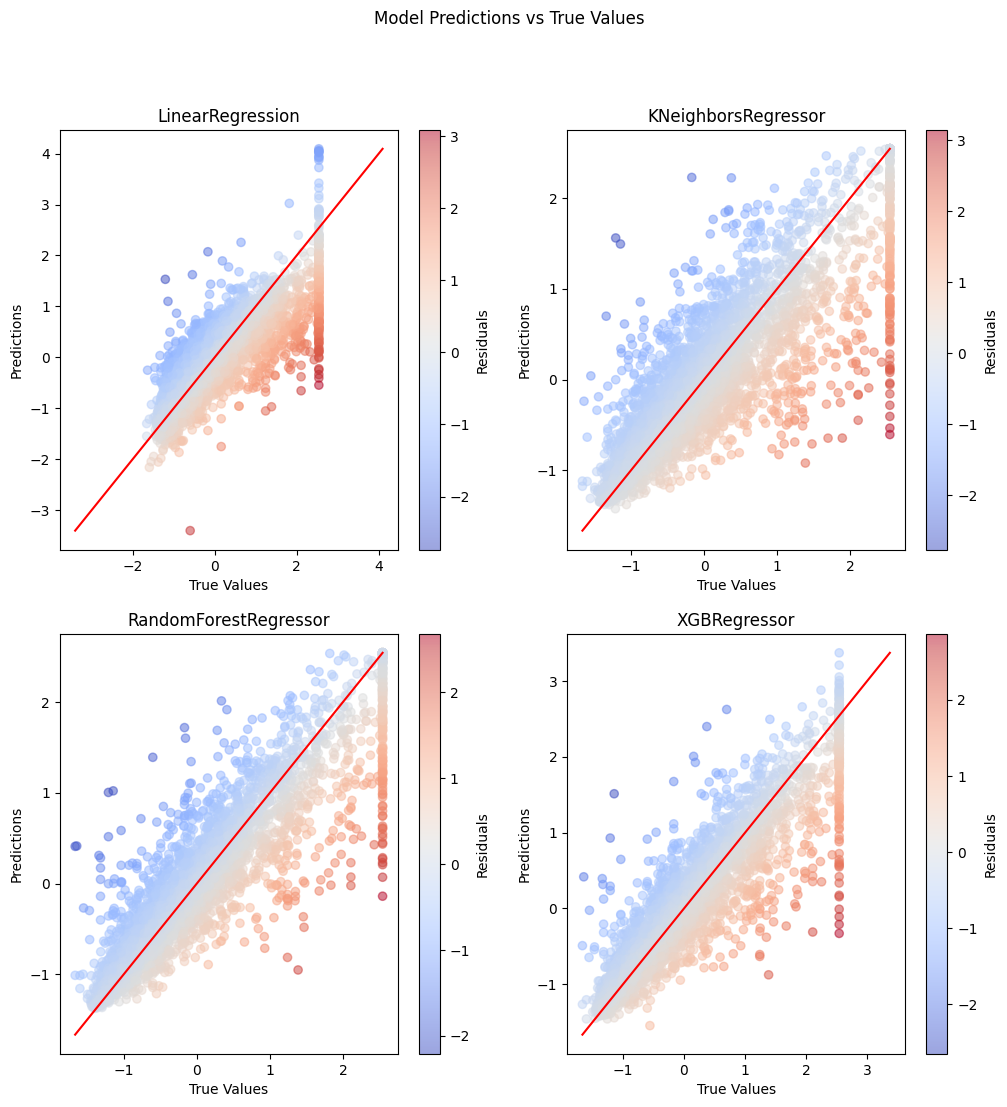

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

models = [
    LinearRegression(),
    KNeighborsRegressor(),
    RandomForestRegressor(),
    XGBRegressor()
]

# 4 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    # plot test vs pred
    fig.suptitle('Model Predictions vs True Values')
    scatter = axs[i // 2, i % 2].scatter(y_test, y_pred, c=residuals, cmap='coolwarm', alpha=0.5)
    axs[i // 2, i % 2].set_xlabel('True Values')
    axs[i // 2, i % 2].set_ylabel('Predictions')
    start_line = min(y_test.min(), y_pred.min())
    end_line = max(y_test.max(), y_pred.max())
    axs[i // 2, i % 2].plot([start_line, end_line], [start_line, end_line], c='red')
    axs[i // 2, i % 2].set_title(model.__class__.__name__)
    
    fig.colorbar(scatter, ax=axs[i // 2, i % 2], label='Residuals')

    print(model.__class__.__name__, mean_squared_error(y_test, y_pred))


# lr = LinearRegression()
# lr.fit(X_train, y_train)
# y_pred = lr.predict(X_test)
# print(mean_squared_error(y_test, y_pred))